In [4]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
filtered = pd.read_csv("Filtering->Balancing.csv",header=[0,1,2],index_col=0)
noisy = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
df = filtered - noisy
df.shape

(32, 52)

In [16]:
mat = df.drop(columns=['pr_rec_score'],level=2,axis=1).droplevel(2,axis=1) #matthews_corrcoef,pr_rec_score
mat

imb                                    smote                                \
clf                                       dt        lr        nb       knn   
activemq-5.8.0.csv                 -0.004034 -0.001731  0.002629  0.010216   
groovy-1_6_BETA_1.csv              -0.014437  0.064535  0.026784  0.028949   
activemq-5.3.0.csv                 -0.002193  0.004430 -0.000037  0.003322   
wicket-1.3.0-incubating-beta-1.csv  0.049564  0.050527  0.007809  0.044076   
jruby-1.1.csv                       0.094536  0.002235  0.033392  0.032606   
jruby-1.4.0.csv                     0.114305  0.044387  0.010372  0.070237   
lucene-2.3.0.csv                    0.143661  0.108426  0.064700  0.133997   
hbase-0.95.2.csv                   -0.122482 -0.157609 -0.292152 -0.164081   
lucene-3.0.0.csv                    0.007156 -0.050879 -0.013249 -0.017767   
camel-2.9.0.csv                    -0.003393  0.008143  0.001292 -0.002208   
wicket-1.5.3.csv                    0.007980  0.018494  0.009278  0.009295   
lucene-3.1.csv                      0.014571  0.007494  0.006364  0.015510   
groovy-1_6_BETA_2.csv               0.002197  0.015427  0.011078 -0.044023   
activemq-5.2.0.csv                  0.033573 -0.005778 -0.008217  0.006252   
groovy-1_5_7.csv                    0.012691 -0.005116  0.007805  0.007656   
hbase-0.95.0.csv                   -0.104702 -0.198961 -0.266198 -0.091640   
camel-2.11.0.csv                    0.015423 -0.000649  0.000538 -0.002634   
jruby-1.7.0.preview1.csv            0.012001 -0.007321  0.001239  0.002509   
hive-0.10.0.csv                    -0.076102 -0.130786 -0.123522 -0.052567   
camel-2.10.0.csv                   -0.003734  0.001438  0.001774 -0.009220   
derby-10.2.1.6.csv                 -0.154702 -0.305423 -0.340278 -0.200271   
jruby-1.5.0.csv                     0.106764  0.031015  0.008687  0.081911   
derby-10.3.1.4.csv                 -0.206919 -0.407008 -0.410995 -0.251308   
lucene-2.9.0.csv                    0.031493  0.016532  0.004523  0.025521   
hbase-0.94.0.csv                   -0.137012 -0.150898 -0.220336 -0.226102   
camel-1.4.0.csv                     0.104262  0.054414  0.001622  0.091281   
activemq-5.1.0.csv                  0.025042 -0.020657  0.006496  0.000868   
activemq-5.0.0.csv                 -0.055951 -0.159501 -0.081002 -0.036252   
derby-10.5.1.1.csv                  0.014459  0.008110 -0.000988 -0.001877   
wicket-1.3.0-beta2.csv              0.035822  0.049595 -0.003106  0.060349   
hive-0.12.0.csv                     0.000041  0.016998 -0.004341 -0.017964   
hive-0.9.0.csv                     -0.223785 -0.381241 -0.462422 -0.312357   

imb                                                rus                      \
clf                                       rf        dt        lr        nb   
activemq-5.8.0.csv                  0.007104  0.016346  0.000792  0.013626   
groovy-1_6_BETA_1.csv               0.013761  0.021953  0.054983  0.023890   
activemq-5.3.0.csv                 -0.025857  0.013427  0.002560 -0.006599   
wicket-1.3.0-incubating-beta-1.csv  0.000312  0.060969  0.036904  0.002174   
jruby-1.1.csv                       0.021999  0.044885  0.005691  0.011728   
jruby-1.4.0.csv                     0.042395  0.097034  0.010999 -0.014687   
lucene-2.3.0.csv                    0.033062  0.180187  0.076868  0.064972   
hbase-0.95.2.csv                   -0.165096  0.051940  0.005710 -0.186287   
lucene-3.0.0.csv                   -0.035966  0.038056  0.004892 -0.029172   
camel-2.9.0.csv                    -0.017967 -0.009281 -0.001258 -0.003155   
wicket-1.5.3.csv                    0.025085 -0.008900  0.019211  0.005870   
lucene-3.1.csv                      0.004269  0.024223  0.004042  0.001042   
groovy-1_6_BETA_2.csv              -0.011146 -0.014260 -0.001087 -0.001720   
activemq-5.2.0.csv                 -0.009952 -0.014753  0.001354 -0.010794   
groovy-1_5_7.csv                    0.012707 -0.028976  0.011308 -0.000873   
hbase-0.95.0.csv     

In [18]:
rank = mat.copy()
for d in mat.index:
    rank.loc[d] = rankdata(mat.loc[d])
rank

imb                                smote                           rus        \
clf                                   dt    lr    nb   knn    rf    dt    lr   
activemq-5.8.0.csv                   8.0  11.0  18.0  22.0  20.0  25.0  16.0   
groovy-1_6_BETA_1.csv                2.0  26.0  20.0  21.0  13.0  17.0  24.0   
activemq-5.3.0.csv                   9.0  19.0  13.0  18.0   3.0  25.0  17.0   
wicket-1.3.0-incubating-beta-1.csv  22.0  23.0  10.0  21.0   6.0  26.0  18.0   
jruby-1.1.csv                       26.0   4.0  16.0  15.0  12.0  21.0   6.0   
jruby-1.4.0.csv                     26.0  15.0   6.0  21.0  14.0  24.0   7.0   
lucene-2.3.0.csv                    25.0  21.0  11.0  24.0   6.0  26.0  16.0   
hbase-0.95.2.csv                    14.0   9.0   1.0   8.0   7.0  26.0  24.0   
lucene-3.0.0.csv                    23.0   6.0  17.0  15.0   9.0  26.0  22.0   
camel-2.9.0.csv                      8.0  23.0  17.0  11.0   2.0   4.0  12.0   
wicket-1.5.3.csv                    16.0  23.0  18.0  19.0  26.0   5.0  24.0   
lucene-3.1.csv                      22.0  19.0  16.0  23.0  12.0  26.0  10.0   
groovy-1_6_BETA_2.csv               13.0  21.0  18.0   1.0   4.0   3.0  10.0   
activemq-5.2.0.csv                  26.0  18.0  15.0  22.0  13.0  11.0  20.0   
groovy-1_5_7.csv                    23.0   5.0  20.0  19.0  24.0   3.0  22.0   
hbase-0.95.0.csv                    13.0   5.0   1.0  16.0   8.0  26.0  25.0   
camel-2.11.0.csv                    25.0  16.0  19.0  14.0  12.0  22.0  10.0   
jruby-1.7.0.preview1.csv            22.0   5.0  12.0  17.0  24.0  14.0  20.0   
hive-0.10.0.csv                     15.0   6.0   7.0  21.0  14.0  26.0  23.0   
camel-2.10.0.csv                     8.0  19.0  20.0   3.0   2.0   4.0  13.0   
derby-10.2.1.6.csv                  15.0   3.0   1.0  10.0   6.0  26.0  25.0   
jruby-1.5.0.csv                     25.0  13.0   3.0  21.0  16.0  24.0  10.0   
derby-10.3.1.4.csv                  19.0   2.0   1.0  14.0  15.0  16.0   8.0   
lucene-2.9.0.csv                    22.0  18.0  13.0  20.0  17.0  25.0  21.0   
hbase-0.94.0.csv                    15.0  10.0   2.0   1.0   9.0  26.0  23.0   
camel-1.4.0.csv                     25.0  18.0   3.0  23.0  13.0  26.0  14.0   
activemq-5.1.0.csv                  26.0   1.0  18.0  12.0   3.0   2.0  22.0   
activemq-5.0.0.csv                  19.0   6.0  13.0  22.0   5.0  25.0  15.0   
derby-10.5.1.1.csv                  21.0  20.0  15.0  14.0   8.0  26.0  22.0   
wicket-1.3.0-beta2.csv              18.0  23.0   7.0  24.0   1.0  26.0  21.0   
hive-0.12.0.csv                     12.0  23.0   7.0   4.0   2.0  17.0   3.0   
hive-0.9.0.csv                      13.0   4.0   2.0   9.0  10.0  23.0  25.0   

imb                                                   ... tomek              \
clf                                   nb   knn    rf  ...    lr    nb   knn   
activemq-5.8.0.csv                  24.0   7.0   6.0  ...   2.0  19.0  17.0   
groovy-1_6_BETA_1.csv               19.0  10.0   8.0  ...  12.0   9.0   1.0   
activemq-5.3.0.csv                   8.0   4.0  21.0  ...   7.0  16.0  23.0   
wicket-1.3.0-incubating-beta-1.csv   8.0  17.0  14.0  ...  11.0   7.0   3.0   
jruby-1.1.csv                       11.0  22.0  19.0  ...   1.0  14.0   5.0   
jruby-1.4.0.csv                      1.0  18.0  13.0  ...  12.0   3.0   9.0   
lucene-2.3.0.csv                    12.0  15.0  23.0  ...   5.0   8.0   2.0   
hbase-0.95.2.csv                     5.0  18.0  25.0  ...  19.0   3.0  17.0   
lucene-3.0.0.csv                    11.0  20.0  24.0  ...  13.0  19.0   4.0   
camel-2.9.0.csv                      9.0  18.0  13.0  ...  16.0  20.0   3.0   
wicket-1.5.3.csv                    15.0  20.0  17.0  ...  12.0  14.0  25.0   
lucene-3.1.csv                       7.0  25.0  13.0  ...  11.0   8.0   2.0   
groovy-1_6_BETA_2.csv                8.0  20.0  15.0  ...   2.0  14.0  17.0   
activemq-5.2.0.csv                  12.0   4.0   9.0  ...  10.0   6.0  16.0   
groovy-1_5_7.cs

In [19]:
rank.mean().sort_values()

imb     clf      
ens     bbag_NB       9.96875
smote   rf           10.50000
rus     nb           10.59375
wilson  nb           10.62500
tomek   nb           10.62500
smote   nb           11.25000
wilson  rf           11.25000
sim     RF           11.62500
        LR           11.68750
tomek   lr           11.71875
wilson  lr           11.87500
tomek   knn          12.28125
wilson  knn          12.62500
smote   lr           13.59375
tomek   rf           13.62500
ens     bbag_DT      13.81250
        rboost_NB    14.12500
        rboost_DT    15.00000
rus     rf           15.37500
        knn          15.71875
smote   knn          15.78125
tomek   dt           16.18750
wilson  dt           16.59375
rus     lr           17.12500
smote   dt           18.00000
rus     dt           19.43750
dtype: float64

In [20]:
mat.mean(level=0,axis=1).mean()

imb
smote    -0.037411
rus      -0.011019
wilson   -0.041593
tomek    -0.028429
ens      -0.028759
sim      -0.024076
dtype: float64

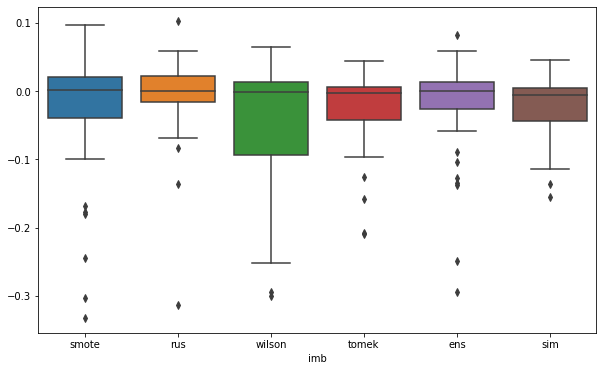

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mat.mean(level=0,axis=1));

In [22]:
mat.mean(level=1,axis=1).mean()

clf
dt          -0.002049
lr          -0.030541
nb          -0.053002
knn         -0.029520
rf          -0.032953
rboost_DT   -0.009435
rboost_NB   -0.023296
bbag_DT     -0.028301
bbag_NB     -0.054003
LR          -0.023596
RF          -0.024557
dtype: float64

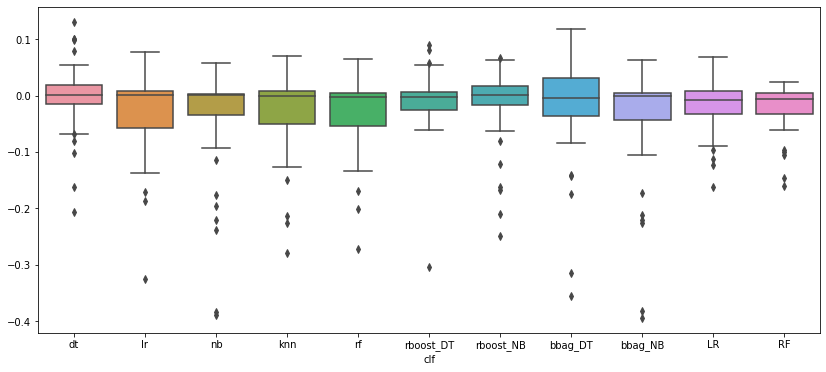

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(data=mat.mean(level=1,axis=1));